Importing necessary libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 

%matplotlib inline 


Importing Titanic dataset which can be found on https://www.kaggle.com/c/titanic

In [5]:
train=pd.read_csv("C:\\Users\\Rohit\\Desktop\\Kaggle\\Titanic dataset\\train.csv",sep=',')
test=pd.read_csv("C:\\Users\\Rohit\\Desktop\\Kaggle\\Titanic dataset\\test.csv",sep=',')

In [3]:
#Preview of datset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# No of missing values in dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age,Embarked have missing values.We need to impute missing values


Cabin has lot of missing values .It is not good to impute missing values in this large amount so we remove the cabin variable

In [5]:
#Shape of dataset (row,column)
train.shape

(891, 12)

Categorical variable-Survived, Sex, and Embarked. Ordinal: Pclass,
Continous Variable-Age, Fare. Discrete: SibSp, Parch.

In [26]:
# data exploration 
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Around 38% passenger survived according to above analysis

Around 75% passenger didnt travel with parents or childern


In [25]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Asplund, Master. Clarence Gustaf Hugo",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Embarked has 3 unique value

Cabin has large no of duplicate values



In [6]:
# Correlation with target variable

In [7]:
train[['Pclass','Survived']].groupby(train['Pclass']).mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


In [8]:
train[['Sex','Survived']].groupby(train['Sex']).mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train[['SibSp','Survived']].groupby(train['SibSp']).mean()

,SibSp,Survived
SibSp,,
0,0.0,0.345395
1,1.0,0.535885
2,2.0,0.464286
3,3.0,0.250000
4,4.0,0.166667
5,5.0,0.000000
8,8.0,0.000000


In [14]:
train[['Parch','Survived']].groupby(train['Parch']).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
Parch,,
3,3.0,0.600000
1,1.0,0.550847
2,2.0,0.500000
0,0.0,0.343658
5,5.0,0.200000
4,4.0,0.000000
6,6.0,0.000000


In [15]:
train[['Embarked','Survived']].groupby(train['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Embarked with port c has 55% survival rate

parch and Sibsp have lot of values that have no correleation with survived.We need to derive new variable from these 2 variables

Sex -74 % female survived

Pclass of 1 has highest survival rate


In [17]:
# Data exploration by visualizing data


More  males than female 

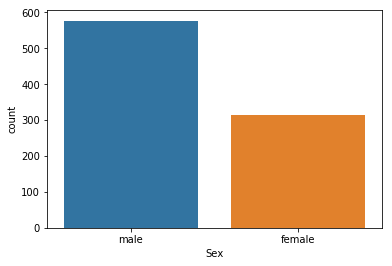

In [28]:
sns.countplot(x='Sex',data=train)


PClass 3 has more no of males

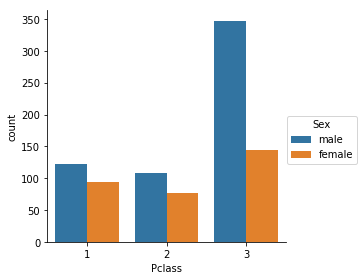

In [32]:
sns.factorplot(x='Pclass',hue='Sex',data=train,kind='count')

Age<4 had high survival rate

Age 80 also survived

Large no of passenger from age 15-35 died



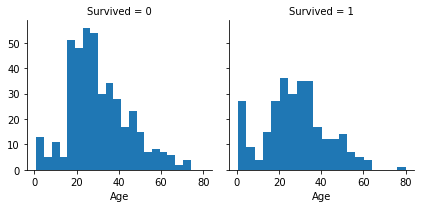

In [42]:
g=sns.FacetGrid(train,col='Survived')
g=g.map(plt.hist,'Age',bins=20)

1.Passenger from pclass 1 had high survival rate


2.Infant in pclass 2,3 mostly survived


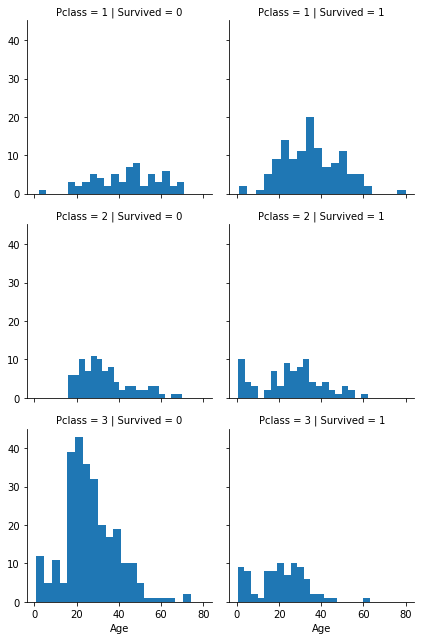

In [45]:
a=sns.FacetGrid(train,col='Survived',row='Pclass')
a=a.map(plt.hist,'Age',bins=20)

Most passengers boarded from S

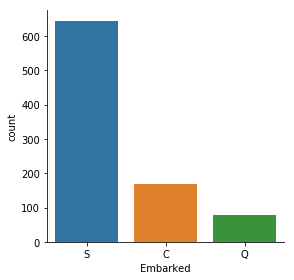

In [48]:
c=sns.factorplot(data=train,x='Embarked',kind='count')

High fare passenger had high survival rate

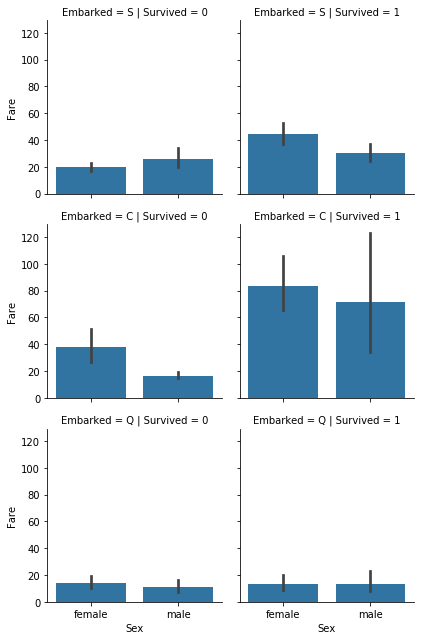

In [62]:
b=sns.FacetGrid(data=train,row='Embarked',col='Survived')
b=b.map(sns.barplot,'Sex','Fare')



In [6]:
#Adding no of family members

train['Alone']=train['SibSp']+train["Parch"]
test['Alone']=test['SibSp']+test["Parch"]


In [7]:
train['Alone'].loc[train['Alone']>0]='no'
train['Alone'].loc[train['Alone']==0]='yes'
test['Alone'].loc[test['Alone']>0]='no'
test['Alone'].loc[test['Alone']==0]='yes'

C:\Users\Rohit\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [145]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,3,male,34.5,0,0,7.8292,Q,1,yes
1,3,female,47.0,1,0,7.0000,S,2,no
2,2,male,62.0,0,0,9.6875,Q,1,yes
3,3,male,27.0,0,0,8.6625,S,1,yes
4,3,female,22.0,1,1,12.2875,S,3,no


Passenger with family had high survival rate compared to alone passenger

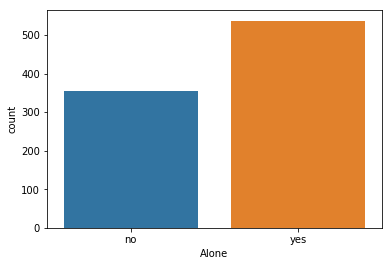

In [91]:
sns.countplot(data=train,x='Alone')

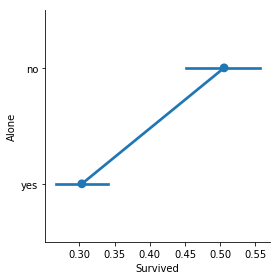

In [92]:
sns.factorplot(data=train,x='Survived',y='Alone')

Data preparation

1.Drop passsengerid,cabin,ticket,name

2.Transform sibsp,parch into family

3.Create age bin

4.create family bin

5.Create new variable Alone

6.Scale fare variable




In [8]:
#delete passengerid,cabin
train=train.drop(['PassengerId','Cabin','Ticket','Name'],axis=1)
test=test.drop(['PassengerId','Cabin','Ticket','Name'],axis=1)


In [9]:
#combine Parch,SibSp=total Family 
train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

In [146]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,3,male,34.5,0,0,7.8292,Q,1,yes
1,3,female,47.0,1,0,7.0000,S,2,no
2,2,male,62.0,0,0,9.6875,Q,1,yes
3,3,male,27.0,0,0,8.6625,S,1,yes
4,3,female,22.0,1,1,12.2875,S,3,no


In [147]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone
0,0,3,male,22.0,1,0,7.2500,S,2,no
1,1,1,female,38.0,1,0,71.2833,C,2,no
2,1,3,female,26.0,0,0,7.9250,S,1,yes
3,1,1,female,35.0,1,0,53.1000,S,2,no
4,0,3,male,35.0,0,0,8.0500,S,1,yes


In [10]:
train=train.drop(['SibSp','Parch'],axis=1)
test=test.drop(['SibSp','Parch'],axis=1)

In [8]:
test.head()


,Pclass,Sex,Age,Fare,Embarked,Alone,Family
0,3,male,34.5,7.8292,Q,yes,1
1,3,female,47.0,7.0000,S,no,2
2,2,male,62.0,9.6875,Q,yes,1
3,3,male,27.0,8.6625,S,yes,1
4,3,female,22.0,12.2875,S,no,3


In [9]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Family
0,0,3,male,22.0,7.2500,S,no,2
1,1,1,female,38.0,71.2833,C,no,2
2,1,3,female,26.0,7.9250,S,yes,1
3,1,1,female,35.0,53.1000,S,no,2
4,0,3,male,35.0,8.0500,S,yes,1


In [10]:
print ('null in age in train',train['Age'].isnull().sum())
print ('null in age in test',test['Age'].isnull().sum())

null in age in train 177
null in age in test 86


In [11]:
#Making copy of dataset train & test
train_1=train.copy()
test_1=test.copy()

In [12]:
#Replacing Age missing values with mean
train_1['Age'].fillna(np.nanmean(train_1['Age']),inplace=True)
test_1['Age'].fillna(np.nanmean(test_1['Age']),inplace=True)

In [13]:
#Create Age bin-

def age_bin(series):
    if series<=16:
        return 'Child'
    elif 16<series<=32:
        return 'Young adult'
    elif 32<series<=60:
        return 'Adult'
    elif series>60:
        return 'Old'

train_1['Agegroup']=train_1['Age'].apply(age_bin)
test_1['Agegroup']=test_1['Age'].apply(age_bin)





In [14]:
print ('train',train_1['Agegroup'].value_counts())
print ('test',test_1['Agegroup'].value_counts())


train Young adult    523
Adult          246
Child          100
Old             22
Name: Agegroup, dtype: int64
test Young adult    264
Adult          109
Child           34
Old             11
Name: Agegroup, dtype: int64


In [15]:
#create family bin
def family_bin(series):
    if series==1:
        return 'Small'
    elif 1<series<=4:
        return 'Medium'
    elif series>4:
        return 'Large'
    
train_1['Familygroup']=train_1['Family'].apply(family_bin)
test_1['Familygroup']=test_1['Family'].apply(family_bin)
        



In [73]:
print ('train',train_1['Familygroup'].value_counts())
print ('test',test_1['Familygroup'].value_counts())

train Small     537
Medium    292
Large      62
Name: Familygroup, dtype: int64
test Small     253
Medium    145
Large      20
Name: Familygroup, dtype: int64


In [74]:
train_1.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       2
Alone          0
Family         0
Agegroup       0
Familygroup    0
dtype: int64

In [75]:
test_1.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Alone          0
Family         0
Agegroup       0
Familygroup    0
dtype: int64

In [76]:
train_1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Family,Agegroup,Familygroup
0,0,3,male,22.0,7.2500,S,no,2,Young adult,Medium
1,1,1,female,38.0,71.2833,C,no,2,Adult,Medium
2,1,3,female,26.0,7.9250,S,yes,1,Young adult,Small
3,1,1,female,35.0,53.1000,S,no,2,Adult,Medium
4,0,3,male,35.0,8.0500,S,yes,1,Adult,Small


In [16]:
#drop Age,Family
train_1=train_1.drop(['Age','Family'],axis=1)
test_1=test_1.drop(['Age','Family'],axis=1)

In [17]:
#copy of train_1,test_1
train_2=train_1.copy()
test_2=test_1.copy()

In [83]:
train_2.isnull().sum()



Survived       0
Pclass         0
Sex            0
Fare           0
Embarked       2
Alone          0
Agegroup       0
Familygroup    0
dtype: int64

In [85]:
train_2['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
#filling Embarked missing value with most common value 'S'
train_2['Embarked'].fillna('S',inplace=True)

In [88]:
test_2.isnull().sum()

Pclass         0
Sex            0
Fare           1
Embarked       0
Alone          0
Agegroup       0
Familygroup    0
dtype: int64

In [19]:
#filling missing value in test dataset  fare  variable with mean
test_2['Fare'].fillna(np.nanmean(test_2['Fare']),inplace=True)

In [90]:
test_2.isnull().sum()

Pclass         0
Sex            0
Fare           0
Embarked       0
Alone          0
Agegroup       0
Familygroup    0
dtype: int64

In [20]:
#scaling fare variable
sc_train=StandardScaler()
train_2['standardfare']=sc_train.fit_transform(train_2['Fare'].reshape(-1,1))
test_2['standardfare']=sc_train.transform(test_2['Fare'].reshape(-1,1))

C:\Users\Rohit\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rohit\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [21]:
#scaling fare in test dataset
test_2['standardfare']=sc_train.transform(test_2['Fare'].reshape(-1,1))

C:\Users\Rohit\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [101]:
train_2.head()


,Survived,Pclass,Sex,Fare,Embarked,Alone,Agegroup,Familygroup,standardfare
0,0,3,male,7.2500,S,no,Young adult,Medium,-0.502445
1,1,1,female,71.2833,C,no,Adult,Medium,0.786845
2,1,3,female,7.9250,S,yes,Young adult,Small,-0.488854
3,1,1,female,53.1000,S,no,Adult,Medium,0.420730
4,0,3,male,8.0500,S,yes,Adult,Small,-0.486337


In [22]:
#remove fare
train_2=train_2.drop(['Fare'],axis=1)
test_2=test_2.drop(['Fare'],axis=1)

In [23]:
#create dummy variable of categorical data
cat_col=['Pclass','Embarked','Alone','Agegroup','Familygroup','Sex']
train_3=pd.get_dummies(train_2,columns=cat_col,drop_first=True)
test_3=pd.get_dummies(test_2,columns=cat_col,drop_first=True)

In [110]:
train_3.head()

,Survived,standardfare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Alone_yes,Agegroup_Child,Agegroup_Old,Agegroup_Young adult,Familygroup_Medium,Familygroup_Small,Sex_male
0,0,-0.502445,0,1,0,1,0,0,0,1,1,0,1
1,1,0.786845,0,0,0,0,0,0,0,0,1,0,0
2,1,-0.488854,0,1,0,1,1,0,0,1,0,1,0
3,1,0.420730,0,0,0,1,0,0,0,0,1,0,0
4,0,-0.486337,0,1,0,1,1,0,0,0,0,1,1


In [112]:
test_3.head()

,standardfare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Alone_yes,Agegroup_Child,Agegroup_Old,Agegroup_Young adult,Familygroup_Medium,Familygroup_Small,Sex_male
0,-0.490783,0,1,1,0,1,0,0,0,0,1,1
1,-0.507479,0,1,0,1,0,0,0,0,1,0,0
2,-0.453367,1,0,1,0,1,0,1,0,0,1,1
3,-0.474005,0,1,0,1,1,0,0,1,0,1,1
4,-0.401017,0,1,0,1,0,0,0,1,1,0,0


In [24]:
#create x_train,y_train,x_test
x_train=train_3.iloc[:,1:].values
y_train=train_3.iloc[:,0].values
x_test=test_3.values

Logistic Regression

In [25]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred=reg.predict(x_test)

In [ ]:
#converting y_pred into dataframe

In [27]:
y_pred_1=pd.DataFrame(y_pred)

In [28]:
y_pred_1=y_pred_1.rename(columns={0:'Survived'})

In [29]:
accuracy=reg.score(x_train,y_train)


In [30]:
accuracy


0.81593714927048255

In [ ]:
#adding passengerid to y_pred_1 dataframe

In [31]:
test_d=pd.read_csv("C:\\Users\\Rohit\\Desktop\\Kaggle\\Titanic dataset\\test.csv",sep=',')

In [32]:
test_d_1=pd.DataFrame()
test_d_1['PassengerId']=test_d['PassengerId']


In [178]:
test_d_1.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [33]:
#concat y_pred_1,test_d_1

final_pred=pd.concat([test_d_1,y_pred_1],axis=1)

In [34]:
final_pred.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

Exporting dataframe to csv file

In [37]:
final_pred.to_csv("C:\\Users\\Rohit\\Desktop\\Kaggle\\Titanic dataset\\pred.csv",sep=',',index=False)